In [11]:
import pandas as pd

# Read CSV files with semicolon as delimiter
df1 = pd.read_csv("prices_round_2_day_-1.csv", delimiter=";")
df2 = pd.read_csv("prices_round_2_day_0.csv", delimiter=";")
df3 = pd.read_csv("prices_round_2_day_1.csv", delimiter=";")

# Adjust timestamps for df2 and df3 so they follow df1 sequentially
df2['timestamp'] = df2['timestamp'] + df1['timestamp'].max()
df3['timestamp'] = df3['timestamp'] + df2['timestamp'].max()

# Concatenate the DataFrames into one
df = pd.concat([df1, df2, df3], ignore_index=True)

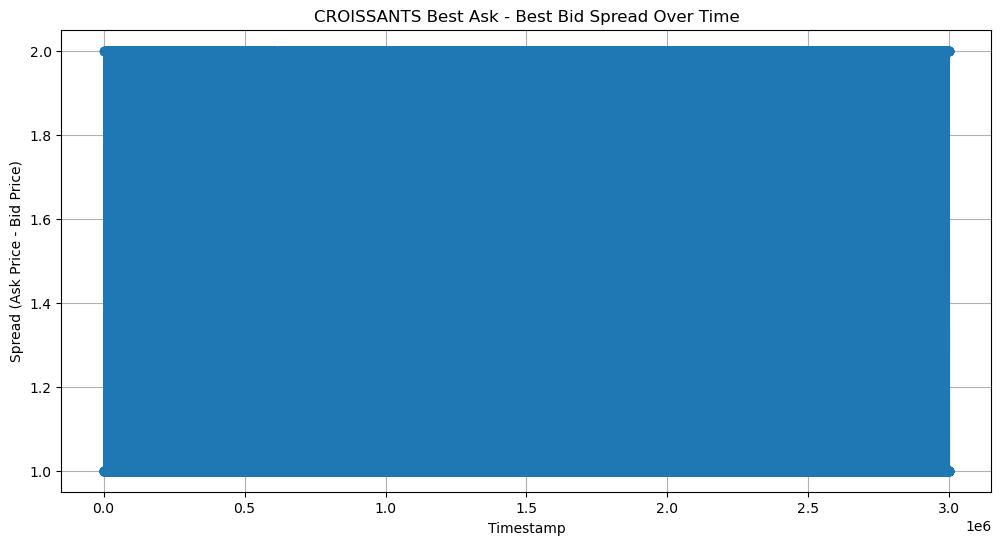

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your concatenated DataFrame with all products, including CROISSANTS.
# First, filter for the CROISSANTS rows.
df_croissants = df[df['product'] == 'CROISSANTS'].copy()

# Compute the spread: best ask - best bid.
# We use the columns 'ask_price_1' and 'bid_price_1'
df_croissants['spread'] = df_croissants['ask_price_1'] - df_croissants['bid_price_1']

# Sort by timestamp so the plot will have increasing time.
df_croissants_sorted = df_croissants.sort_values('timestamp')

# Optionally, if your timestamp is a Unix timestamp or integer,
# you might convert it to a datetime. For example:
# df_croissants_sorted['timestamp'] = pd.to_datetime(df_croissants_sorted['timestamp'], unit='s')

# Plot the time-series of the spread.
plt.figure(figsize=(12, 6))
plt.plot(df_croissants_sorted['timestamp'], df_croissants_sorted['spread'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Spread (Ask Price - Bid Price)')
plt.title('CROISSANTS Best Ask - Best Bid Spread Over Time')
plt.grid(True)
plt.show()


In [13]:
# Pivot the DataFrame: use pivot_table with an aggregation function to handle duplicates.
# Here, aggfunc='first' picks the first mid_price value encountered for duplicates.
pivot_df = df.pivot_table(index="timestamp", columns="product", values="mid_price", aggfunc='first')

# Optionally, sort the DataFrame by index and columns for clarity
df_final = pivot_df.sort_index().sort_index(axis=1)

# Display the first few rows of the final DataFrame
print(df_final.tail())



product    CROISSANTS  DJEMBES    JAMS    KELP  PICNIC_BASKET1  \
timestamp                                                        
2999300        4268.5  13418.5  6520.0  2056.0         58720.5   
2999400        4268.5  13417.5  6519.5  2056.0         58719.5   
2999500        4268.5  13418.0  6519.5  2053.5         58715.0   
2999600        4268.5  13418.0  6520.0  2054.0         58725.5   
2999700        4266.5  13419.5  6520.0  2055.0         58718.5   

product    PICNIC_BASKET2  RAINFOREST_RESIN  SQUID_INK  
timestamp                                               
2999300           30117.5            9995.5     1878.5  
2999400           30115.0           10000.0     1880.0  
2999500           30112.0            9997.5     1878.5  
2999600           30112.5           10000.0     1882.0  
2999700           30103.5           10000.0     1882.0  


In [14]:
# Compute the correlation matrix using only numeric columns
correlations = df_final.corr()

# Print the entire correlation matrix
print(correlations)

product           CROISSANTS   DJEMBES      JAMS      KELP  PICNIC_BASKET1  \
product                                                                      
CROISSANTS          1.000000  0.840317  0.885382 -0.735313        0.950029   
DJEMBES             0.840317  1.000000  0.820147 -0.635354        0.819287   
JAMS                0.885382  0.820147  1.000000 -0.795391        0.946332   
KELP               -0.735313 -0.635354 -0.795391  1.000000       -0.768855   
PICNIC_BASKET1      0.950029  0.819287  0.946332 -0.768855        1.000000   
PICNIC_BASKET2      0.907530  0.738498  0.953199 -0.829760        0.955920   
RAINFOREST_RESIN   -0.006767 -0.005454 -0.004905  0.004011       -0.006938   
SQUID_INK           0.715509  0.608835  0.798826 -0.643998        0.698872   

product           PICNIC_BASKET2  RAINFOREST_RESIN  SQUID_INK  
product                                                        
CROISSANTS              0.907530         -0.006767   0.715509  
DJEMBES                 0.7

In [15]:
print(correlations['PICNIC_BASKET1'])

product
CROISSANTS          0.950029
DJEMBES             0.819287
JAMS                0.946332
KELP               -0.768855
PICNIC_BASKET1      1.000000
PICNIC_BASKET2      0.955920
RAINFOREST_RESIN   -0.006938
SQUID_INK           0.698872
Name: PICNIC_BASKET1, dtype: float64


In [16]:
print(correlations['PICNIC_BASKET2'])

product
CROISSANTS          0.907530
DJEMBES             0.738498
JAMS                0.953199
KELP               -0.829760
PICNIC_BASKET1      0.955920
PICNIC_BASKET2      1.000000
RAINFOREST_RESIN   -0.006985
SQUID_INK           0.772625
Name: PICNIC_BASKET2, dtype: float64


In [17]:
print(correlations['SQUID_INK'])

product
CROISSANTS          0.715509
DJEMBES             0.608835
JAMS                0.798826
KELP               -0.643998
PICNIC_BASKET1      0.698872
PICNIC_BASKET2      0.772625
RAINFOREST_RESIN   -0.006357
SQUID_INK           1.000000
Name: SQUID_INK, dtype: float64


In [18]:
import statsmodels.api as sm

X = df_final[['DJEMBES', 'CROISSANTS', 'JAMS']]
y = df_final['PICNIC_BASKET1']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         PICNIC_BASKET1   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.109e+05
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:45:23   Log-Likelihood:            -1.7302e+05
No. Observations:               29998   AIC:                         3.460e+05
Df Residuals:                   29994   BIC:                         3.461e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9245.0779    180.382     51.253      0.0

In [19]:
X2 = df_final[['DJEMBES', 'CROISSANTS', 'JAMS']]
y2 = df_final['PICNIC_BASKET2']

X2 = sm.add_constant(X2)
model = sm.OLS(y2, X2).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         PICNIC_BASKET2   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.877e+05
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:45:23   Log-Likelihood:            -1.5891e+05
No. Observations:               29998   AIC:                         3.178e+05
Df Residuals:                   29994   BIC:                         3.179e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.352e+04    112.713    119.968      0.0